In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
import keras
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [0]:
base_dir = 'gdrive/My Drive/Colab Notebooks/BSULogo'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [12]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
conv_base.trainable = False

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=2)

FileNotFoundError: ignored

In [0]:
model.save('gdrive/My Drive/Colab Notebooks/BSULogo/FinalModel.h5')

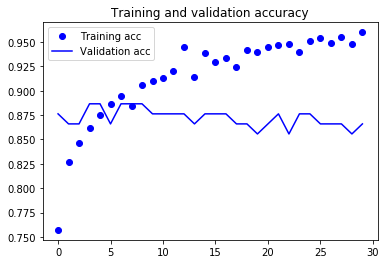

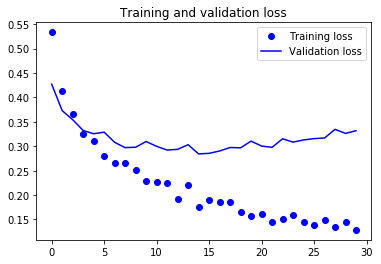

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from keras.models import load_model
loaded_model = load_model('gdrive/My Drive/Colab Notebooks/BSULogo/FinalModel.h5')

OSError: ignored

In [0]:
import numpy as np
import cv2

img = cv2.imread('gdrive/My Drive/Colab Notebooks/BSULogo/Bflyer.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

In [0]:
loaded_model.predict_classes(img)


array([[0]], dtype=int32)

In [0]:
classes = train_generator.class_indices
print(classes)

{'BroncoB': 0, 'NotBroncoB': 1}
